In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
from scipy.stats import linregress
from sklearn import datasets

In [20]:
#import csv file and create dataframe
csv_path  = "Resources/OSF_socialmedia_data.csv"
social_media_df = pd.read_csv(csv_path)
social_media_df.head()

,Unnamed: 0,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,...,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,AutoPSMU,News,Active
0,1,115091,05/02/2017,Tuesday,10:00:06,Daily questions,1,1,1,1,...,61.0,64.0,68.0,50.0,56.0,73.0,66.0,66,39.0,38.0
1,2,115091,05/02/2017,Tuesday,12:02:48,Daily questions,2,1,1,1,...,57.0,70.0,58.0,37.0,56.0,67.0,0.0,#skipped#,27.0,23.0
2,3,115091,05/02/2017,Tuesday,14:03:02,Daily questions,3,1,1,1,...,44.0,70.0,67.0,26.0,38.0,39.0,63.0,56,34.0,36.0
3,4,115091,05/02/2017,Tuesday,16:34:28,Daily questions,4,1,1,1,...,56.0,79.0,89.0,30.0,20.0,60.0,67.0,68,29.0,23.0
4,5,115091,05/02/2017,Tuesday,18:00:00,Daily questions,5,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
social_media_df.dropna(how = "all")


cleaned_social_media = social_media_df.drop(['LifePak.Download.No','Session.Name', 'Session.Instance.Response.Lapse', 'Instr_DQs', 'Unnamed: 0', 'Reminders.Delivered', 'Responded', 'Completed.Session'], axis = 1)
cleaned_social_media = cleaned_social_media.dropna(axis = 0, how = 'any')
cleaned_social_media.head(10)


cleaned_social_media.to_csv('Resources/cleaned_data.csv')
cleaned_social_media.head(10)

,Participant,Date,Day,Time,Notification.No,Session.Instance,Fatigue,DeprMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,AutoPSMU,News,Active
0,115091,05/02/2017,Tuesday,10:00:06,1,1.0,61.0,55.0,61.0,64.0,68.0,50.0,56.0,73.0,66.0,66,39.0,38.0
1,115091,05/02/2017,Tuesday,12:02:48,2,2.0,28.0,59.0,57.0,70.0,58.0,37.0,56.0,67.0,0.0,#skipped#,27.0,23.0
2,115091,05/02/2017,Tuesday,14:03:02,3,3.0,24.0,20.0,44.0,70.0,67.0,26.0,38.0,39.0,63.0,56,34.0,36.0
3,115091,05/02/2017,Tuesday,16:34:28,4,4.0,63.0,25.0,56.0,79.0,89.0,30.0,20.0,60.0,67.0,68,29.0,23.0
5,115091,05/02/2017,Tuesday,20:02:12,6,5.0,16.0,22.0,0.0,27.0,83.0,15.0,3.0,25.0,16.0,10,0.0,0.0
6,115091,05/02/2017,Tuesday,22:01:31,7,6.0,58.0,17.0,0.0,44.0,72.0,25.0,17.0,52.0,6.0,2,8.0,1.0
7,115091,05/03/2017,Wednesday,10:02:28,1,7.0,69.0,16.0,19.0,59.0,38.0,13.0,15.0,25.0,57.0,61,21.0,57.0
8,115091,05/03/2017,Wednesday,12:04:05,2,8.0,69.0,20.0,8.0,64.0,61.0,11.0,19.0,21.0,16.0,18,10.0,16.0
10,115091,05/03/2017,Wednesday,16:17:52,4,9.0,86.0,20.0,25.0,63.0,66.0,9.0,18.0,69.0,55.0,18,4.0,25.0
11,115091,05/03/2017,Wednesday,18:06:06,5,10.0,71.0,32.0,29.0,69.0,81.0,17.0,15.0,61.0,69.0,61,20.0,15.0


In [22]:
participant_group = cleaned_social_media.groupby('Day')
#participant_group.head(125)

In [23]:

participant_group.describe()

Participant                                                   \
                count          mean           std       min        25%   
Day                                                                      
Friday         1188.0  5.327458e+06  2.812972e+06  115091.0  3044816.0   
Monday         1276.0  5.428912e+06  2.843181e+06  115091.0  3065915.0   
Saturday       1145.0  5.326687e+06  2.887027e+06  115091.0  2932753.0   
Sunday         1169.0  5.392836e+06  2.912475e+06  115091.0  3044816.0   
Thursday       1302.0  5.338835e+06  2.826049e+06  115091.0  3158214.0   
Tuesday        1284.0  5.301496e+06  2.801177e+06  115091.0  3065915.0   
Wednesday      1267.0  5.399008e+06  2.830563e+06  115091.0  3065915.0   

                                           Notification.No            ...  \
                 50%        75%        max           count      mean  ...   
Day                                                                   ...   
Friday     5355429.5  7949149.0  9873359.0          1188.0  3.913300  ...   
Monday     5485419.0  8090378.0  9873359.0          1276.0  4.007837  ...   
Saturday   5485419.0  8055680.0  9873359.0          1145.0  3.993886  ...   
Sunday     5485419.0  8114008.0  9873359.0          1169.0  4.089820  ...   
Thursday   5269413.0  7949149.0  9873359.0          1302.0  3.972350  ...   
Tuesday    5244906.0  7949149.0  9873359.0          1284.0  3.960280  ...   
Wednesday  5485419.0  8055680.0  9873359.0          1267.0  3.955801  ...   

           News         Active                                               \
            75%    max   count       mean        std  min  25%   50%    75%   
Day                                                                           
Friday     31.0   98.0  1188.0  20.981481  25.399547  0.0  0.0  10.0  31.00   
Monday     28.0   96.0  1276.0  20.954545  24.723306  0.0  0.0  12.0  32.00   
Saturday   29.0  100.0  1145.0  18.429694  24.015449  0.0  0.0   9.0  27.00   
Sunday     32.0   98.0  1169.0  20.142857  25.392891  0.0  0.0  10.0  30.00   
Thursday   31.0  100.0  1302.0  23.010753  25.884029  0.0  0.0  14.0  37.75   
Tuesday    32.0  100.0  1284.0  22.154206  25.648980  0.0  0.0  13.0  35.00   
Wednesday  35.0   90.0  1267.0  23.851618  25.782327  0.0  0.0  16.0  38.00   

                  
             max  
Day               
Friday      98.0  
Monday     100.0  
Saturday   100.0  
Sunday     100.0  
Thursday    93.0  
Tuesday    100.0  
Wednesday  100.0  

[7 rows x 112 columns]

In [24]:

monday = cleaned_social_media[(cleaned_social_media['Day'] ==  'Monday') & (cleaned_social_media['Active'] >= 50) ]
tuesday = cleaned_social_media[(cleaned_social_media['Day'] ==  'Tuesday') & (cleaned_social_media['Active'] >= 50) ]
wednesday = cleaned_social_media[(cleaned_social_media['Day'] ==  'Wednesday') & (cleaned_social_media['Active'] >=50) ]
thursday = cleaned_social_media[(cleaned_social_media['Day'] ==  'Thursday') & (cleaned_social_media['Active'] >= 50) ]
friday = cleaned_social_media[(cleaned_social_media['Day'] ==  'Friday') & (cleaned_social_media['Active'] >=50) ]
saturday = cleaned_social_media[(cleaned_social_media['Day'] ==  'Saturday') & (cleaned_social_media['Active'] >=50) ]
sunday = cleaned_social_media[(cleaned_social_media['Day'] ==  'Sunday') & (cleaned_social_media['Active'] >=50) ]

#monday = cleaned_social_media[(cleaned_social_media['Day'] ==  'Monday')] 
#tuesday = cleaned_social_media[(cleaned_social_media['Day'] ==  'Tuesday')] 
#wednesday = cleaned_social_media[(cleaned_social_media['Day'] ==  'Wednesday')]
#thursday = cleaned_social_media[(cleaned_social_media['Day'] ==  'Thursday') ]
#friday = cleaned_social_media[(cleaned_social_media['Day'] ==  'Friday') ]
#saturday = cleaned_social_media[(cleaned_social_media['Day'] ==  'Saturday')]
#sunday = cleaned_social_media[(cleaned_social_media['Day'] ==  'Sunday') ]

In [25]:
#monday.describe()
#tuesday.describe()
#wednesday.describe()
#thursday.describe()
#friday.describe()
#saturday.describe()
#sunday.describe()


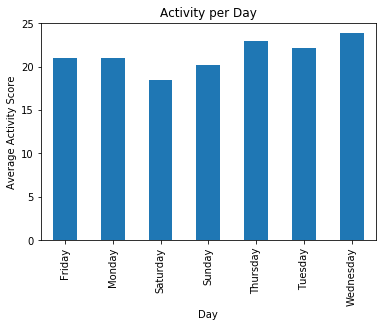

In [45]:
weekday_activity = cleaned_social_media.groupby(['Day'])['Active'].mean().reindex()
weekday_activity.plot.bar()
plt.title("Activity per Day")
plt.xlabel("Day")
plt.ylabel("Average Activity Score")
plt.savefig('Day vs Activity ')
plt.show()

The r-squared is: 0.007505773340876133


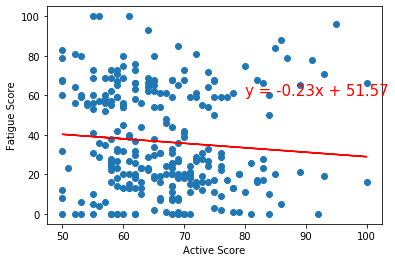

In [46]:

x_values = wednesday['Active']
y_values = wednesday['Fatigue']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,60),fontsize=15,color="red")
plt.xlabel('Active Score')
plt.ylabel('Fatigue Score')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('active vs fatigue')
plt.show()

The r-squared is: 0.00097486050794132


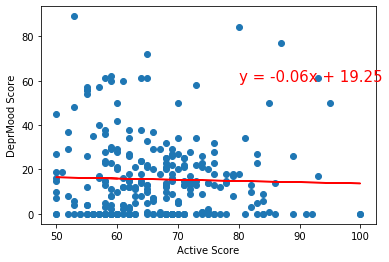

In [47]:
x_values = wednesday['Active']
y_values = wednesday['DeprMood']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,60),fontsize=15,color="red")
plt.xlabel('Active Score')
plt.ylabel('DeprMood Score')
print(f"The r-squared is: {rvalue**2}")

plt.savefig('active vs DeprMood')
plt.show()

The r-squared is: 0.0003449248851513928


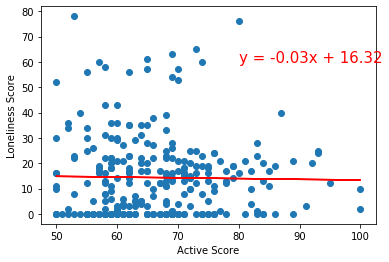

In [48]:
x_values = wednesday['Active']
y_values = wednesday['Loneliness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,60),fontsize=15,color="red")
plt.xlabel('Active Score')
plt.ylabel('Loneliness Score')
print(f"The r-squared is: {rvalue**2}")

plt.savefig('active vs Loneliness')
plt.show()

The r-squared is: 0.007601238324562476


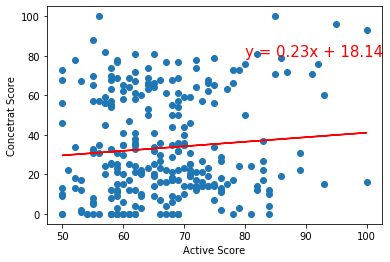

In [49]:
y_values = wednesday['Concentrat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,80),fontsize=15,color="red")
plt.xlabel('Active Score')
plt.ylabel('Concetrat Score')
print(f"The r-squared is: {rvalue**2}")

plt.savefig('Active vs Concentrat')
plt.show()

The r-squared is: 9.171377753756182e-05


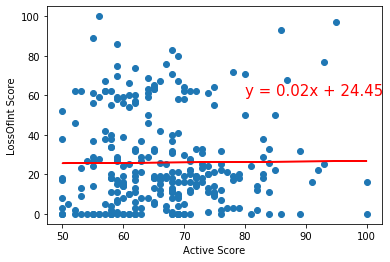

In [50]:
x_values = wednesday['Active']
y_values = wednesday['LossOfInt']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,60),fontsize=15,color="red")
plt.xlabel('Active Score')
plt.ylabel('LossOfInt Score')
print(f"The r-squared is: {rvalue**2}")

plt.savefig('active vs LossOfInt')
plt.show()

The r-squared is: 0.0009100170689540667


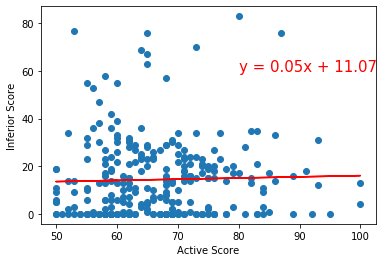

In [51]:
x_values = wednesday['Active']
y_values = wednesday['Inferior']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,60),fontsize=15,color="red")
plt.xlabel('Active Score')
plt.ylabel('Inferior Score')
print(f"The r-squared is: {rvalue**2}")

plt.savefig('active vs inferior')
plt.show()

The r-squared is: 0.0008687632752253545


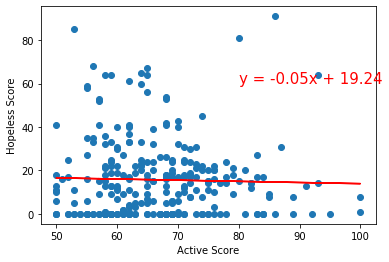

In [52]:

x_values = wednesday['Active']
y_values = wednesday['Hopeless']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,60),fontsize=15,color="red")
plt.xlabel('Active Score')
plt.ylabel('Hopeless Score')
print(f"The r-squared is: {rvalue**2}")

plt.savefig('active vs hope')
plt.show()

The r-squared is: 0.004511715305477022


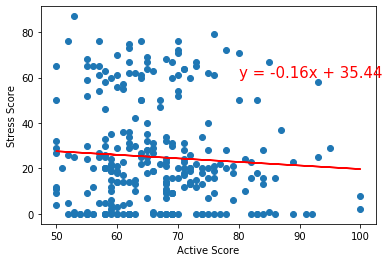

In [53]:
y_values = wednesday['Stress']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,60),fontsize=15,color="red")
plt.xlabel('Active Score')
plt.ylabel('Stress Score')
print(f"The r-squared is: {rvalue**2}")

plt.savefig('active vs stress')
plt.show()